In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
data_url = "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/red-wine-quality-cortez-et-al-2009.zip"
df = pd.read_csv(data_url)

<IPython.core.display.Javascript object>

Get to know the data, what should we do?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<IPython.core.display.Javascript object>

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<IPython.core.display.Javascript object>

In [13]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<IPython.core.display.Javascript object>

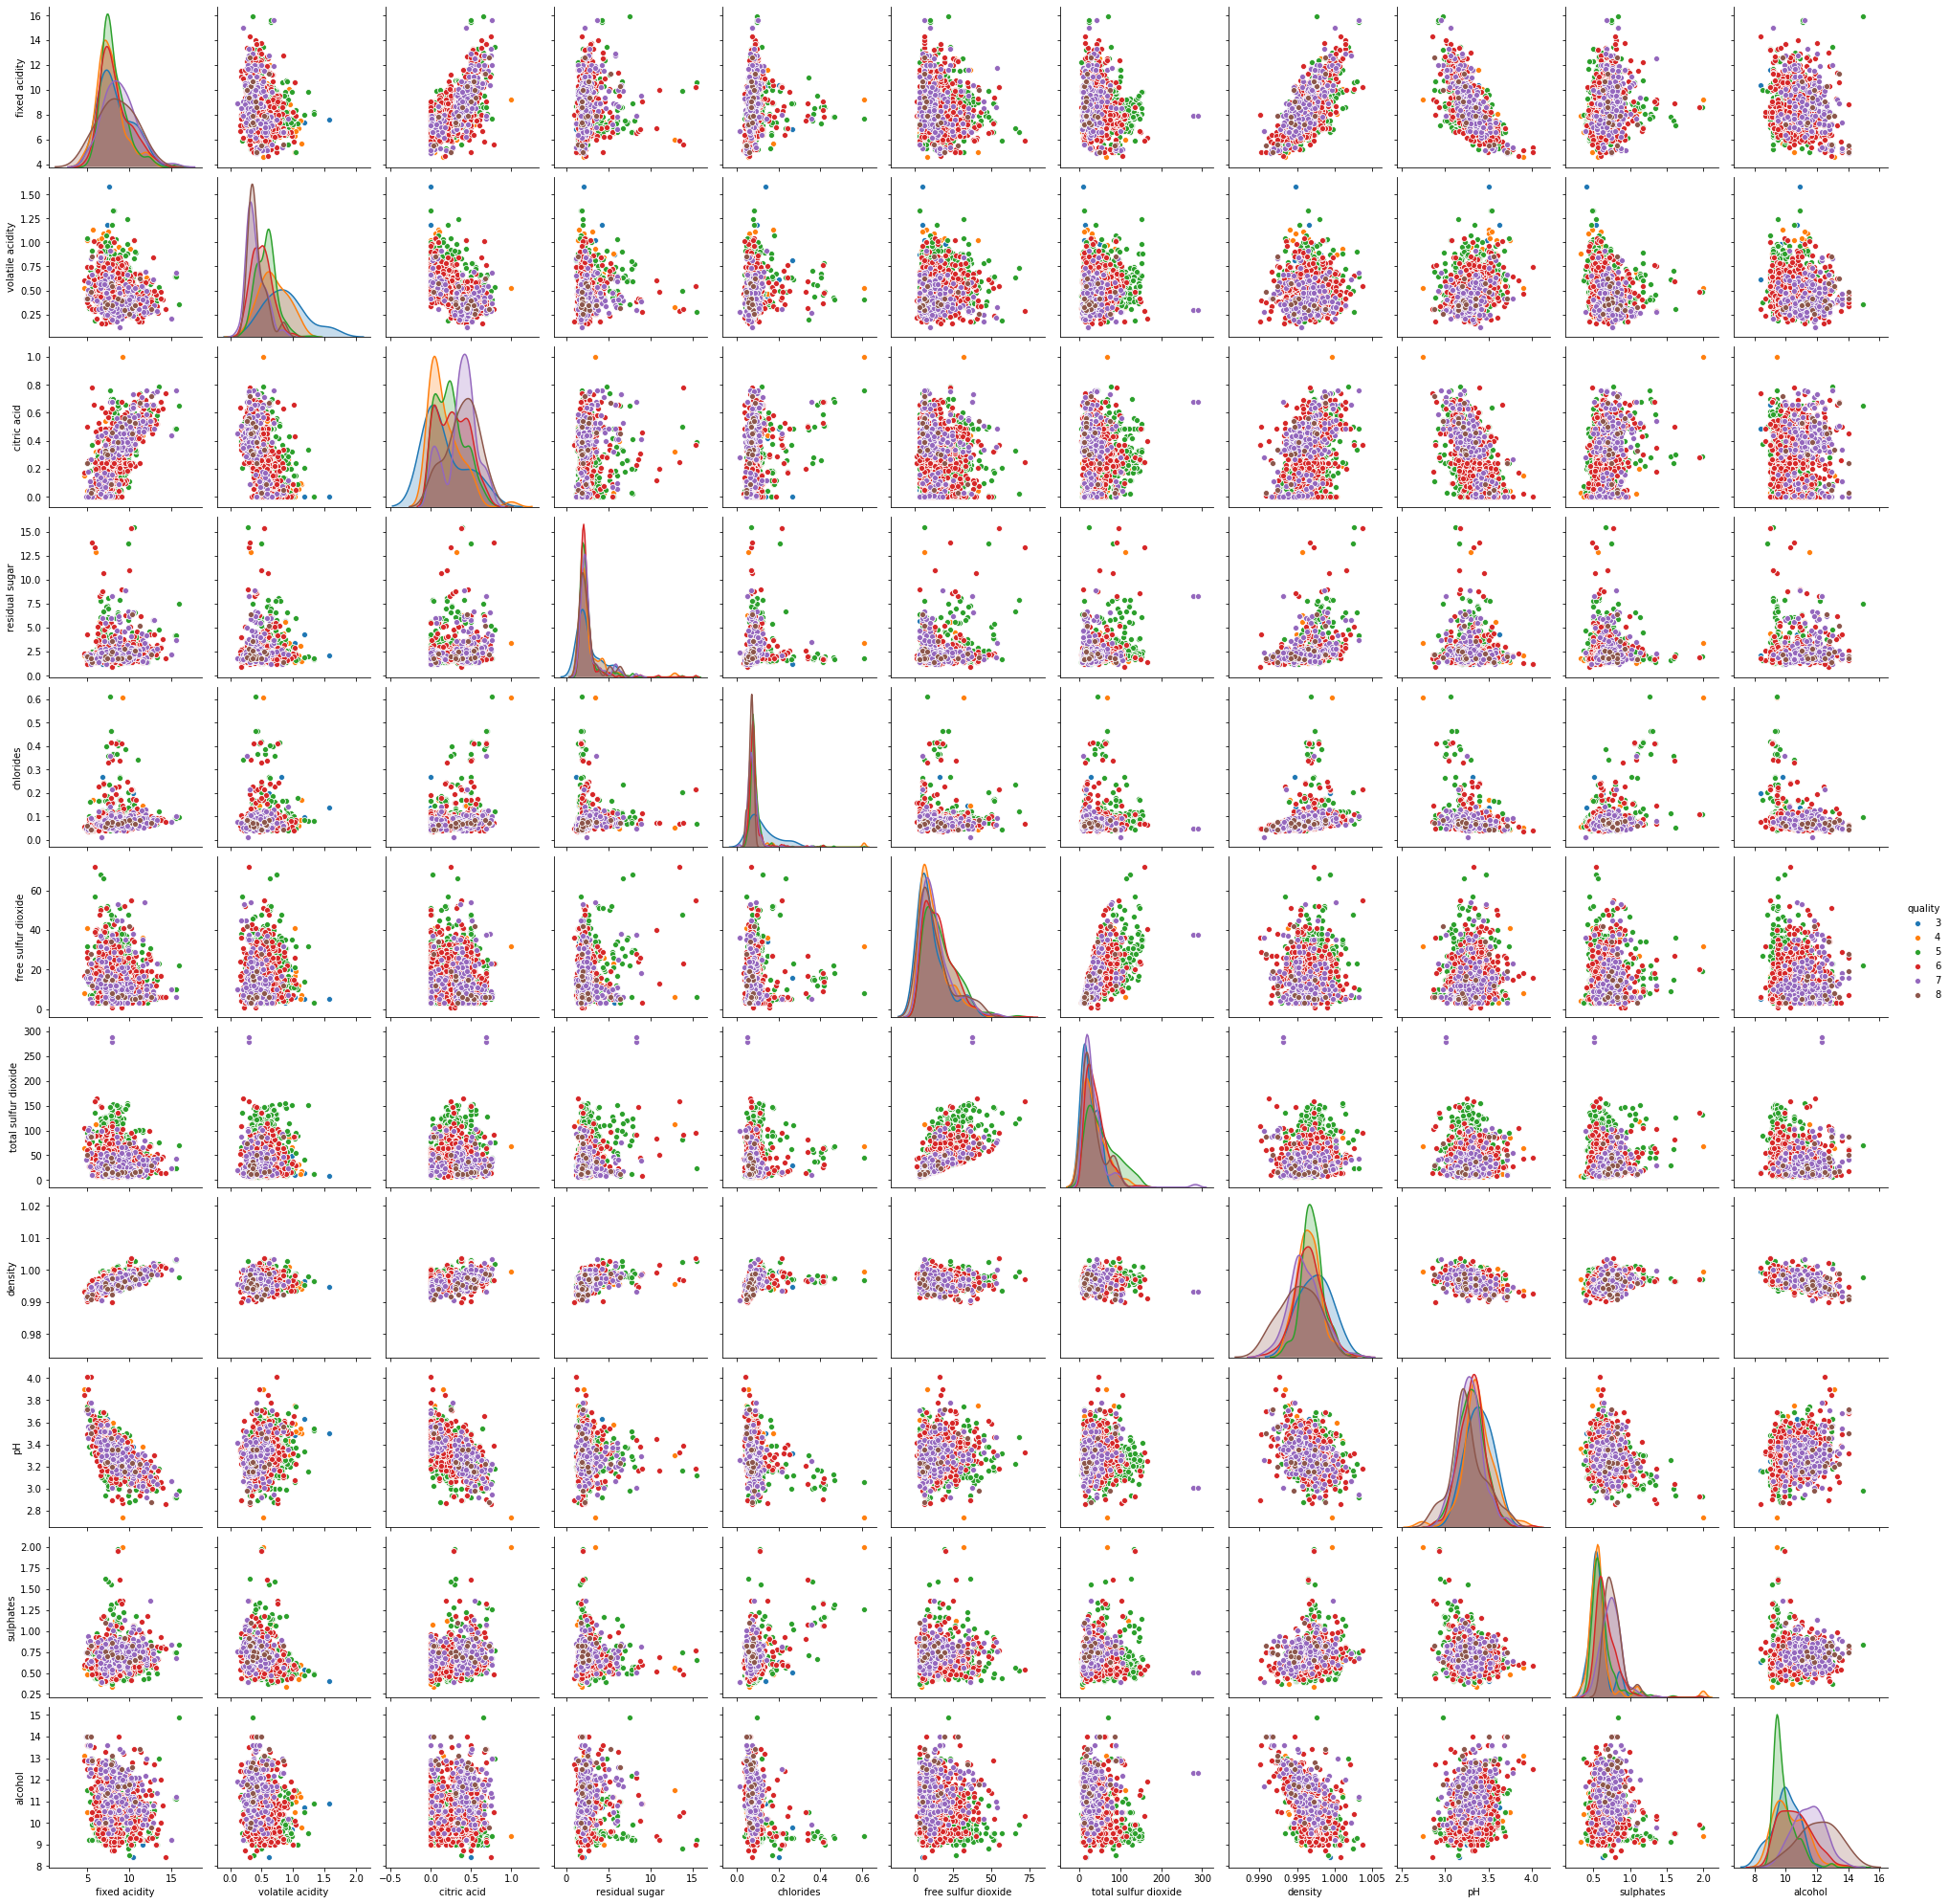

<IPython.core.display.Javascript object>

In [14]:
# careful, slow code
# sns.pairplot(df, hue="quality")

C:\Users\dgump\miniconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\dgump\miniconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\dgump\miniconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\dgump\miniconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\dgump\miniconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


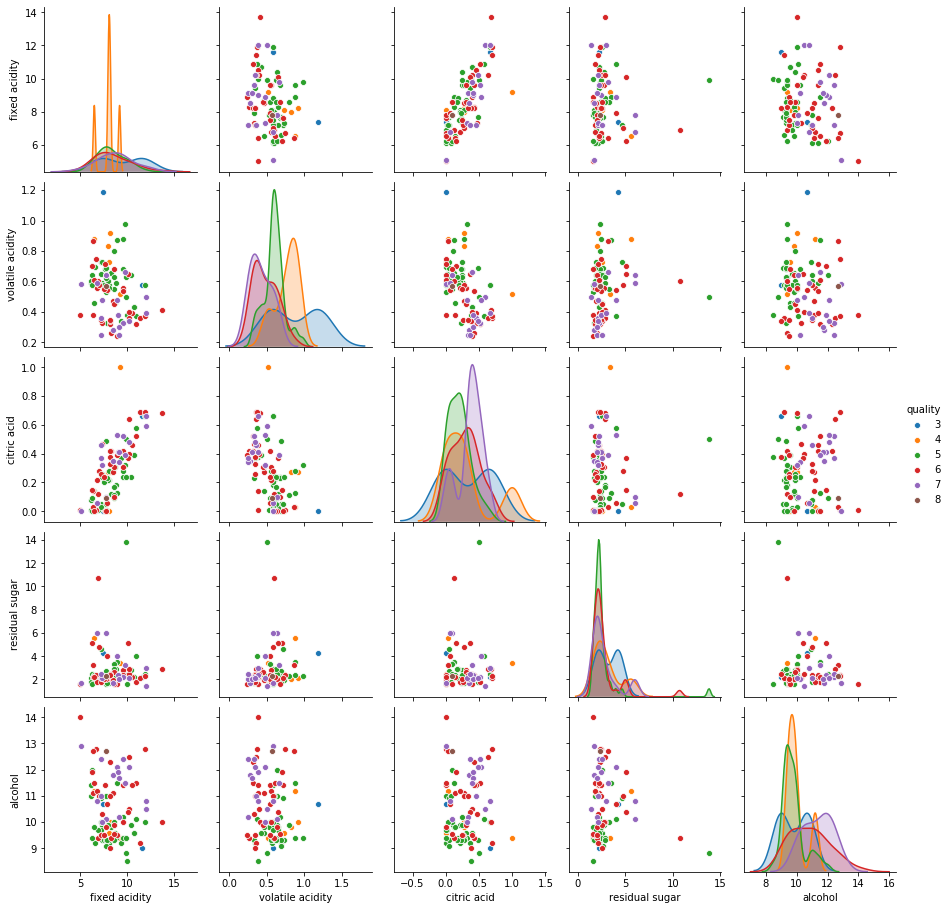

<IPython.core.display.Javascript object>

In [18]:
cols = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "alcohol",
    "quality",
]

sns.pairplot(df[cols].sample(100), hue="quality")
plt.show()


We want to predict `'quality'` (we're going to convert it to binary).  What's the current distribution of scores? (create a histogram).

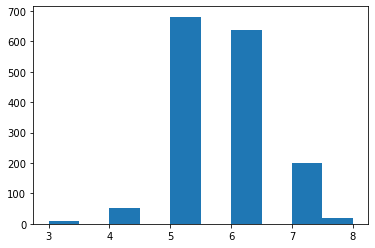

<IPython.core.display.Javascript object>

In [19]:
plt.hist(df["quality"])
plt.show()

The first decision is how to translate the continuous outcome variable to categorical. We get the best class balance (number of samples from each category) if we make a cutoff at between 5 and 6, assigning a 1 if quality is 6 or above.

This is a situation where use case comes in; in the future there will typically be a reason to choose a cutoff.

* Create a binary variable indicating quality.

In [22]:
df["quality_bin"] = (df["quality"] >= 6).astype(int)
df["quality_bin"].value_counts(normalize=True)

1    0.534709
0    0.465291
Name: quality_bin, dtype: float64

<IPython.core.display.Javascript object>

* What does the distribution of this binary variable look like?

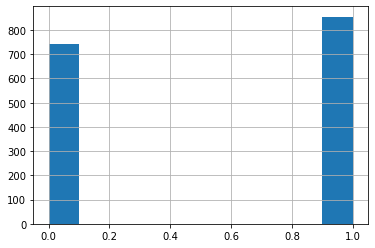

<IPython.core.display.Javascript object>

In [24]:
df["quality_bin"].hist()

* What percentage of the binary variable are `1`s? `0`s?
* Why do we care about this?
  * If we had 80% `1`s and we ended up with 80% accuracy, is that good?

* Split the data into `X` & `y`

In [25]:
X = df.drop(columns=["quality_bin", "quality"])
y = df["quality_bin"]

<IPython.core.display.Javascript object>

* Perform a train test split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

In [32]:
X.melt()

,variable,value
0,fixed acidity,7.4
1,fixed acidity,7.8
2,fixed acidity,7.8
3,fixed acidity,11.2
4,fixed acidity,7.4
...,...,...
17584,alcohol,10.5
17585,alcohol,11.2
17586,alcohol,11.0
17587,alcohol,10.2


<IPython.core.display.Javascript object>

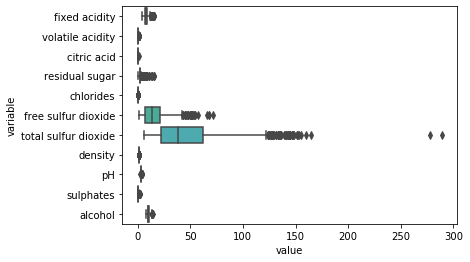

<IPython.core.display.Javascript object>

In [31]:
sns.boxplot("value", "variable", data=X.melt())

* Create a boxplot for every feature in `X`

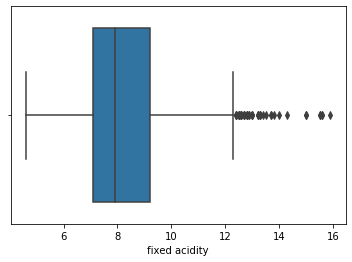

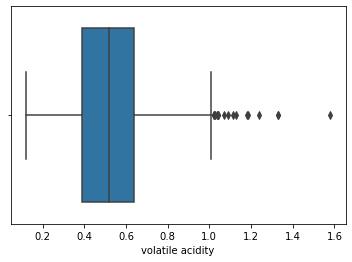

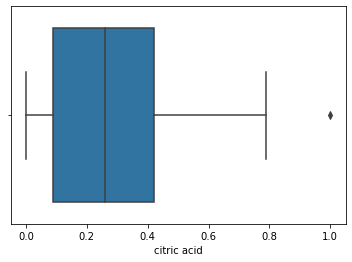

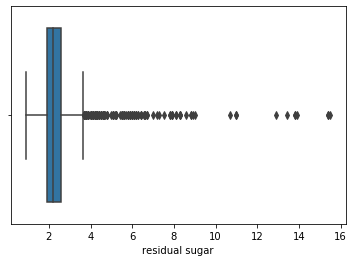

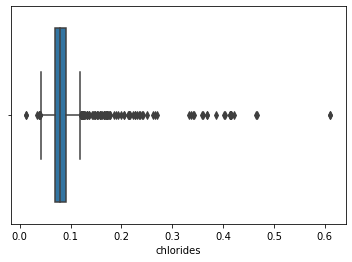

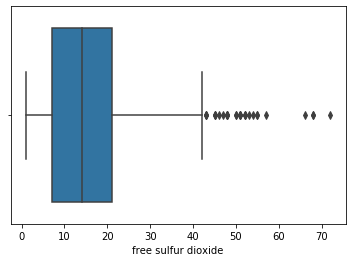

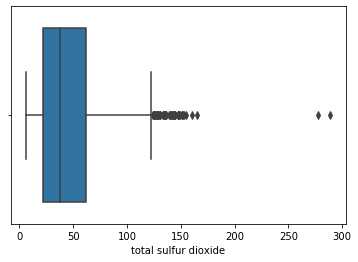

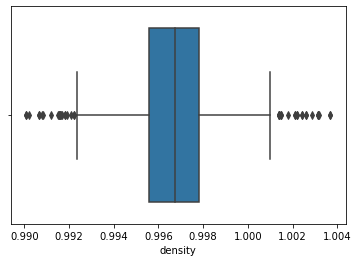

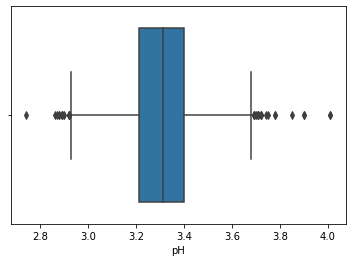

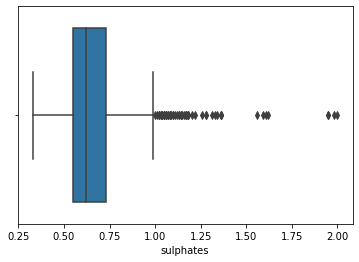

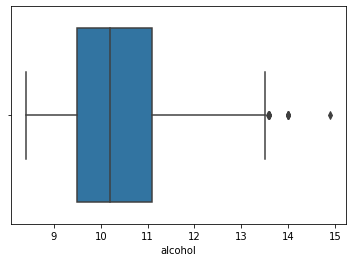

<IPython.core.display.Javascript object>

In [28]:
for col in X:
    sns.boxplot(X[col])
    plt.show()

* What do you think will be good predictors of quality? Why? How can you prove it?

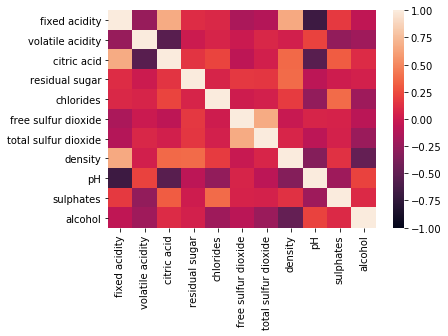

<IPython.core.display.Javascript object>

In [34]:
# colinearity? Highly corr features? Redundancy?
sns.heatmap(X_train.corr(), vmin=-1, vmax=1)
plt.show()

* Fit a logistic regression model to the data to predict quality.

In [ ]:
cols = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "alcohol",
    "quality_bin",
]

In [38]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<IPython.core.display.Javascript object>

In [39]:
model.score(X_train, y_train)

0.7490226739640344

<IPython.core.display.Javascript object>

In [37]:
model.score(X_test, y_test)

0.740625

<IPython.core.display.Javascript object>

* How is the model's fit?

* What are the coefficients of the model?

In [42]:
model.coef_[0]

array([ 0.09654945, -2.53130516, -0.65180525, -0.0091592 , -1.09477543,
        0.03134799, -0.01824307, -0.03064983, -0.2178725 ,  1.95982999,
        0.93128053])

<IPython.core.display.Javascript object>

* What are some options we might investigate to increase accuracy?

In [44]:
# * would scaling help? what scaler?
# * kbest?
# * PCA?
# * More EDA? pattern breaking outliers?
# * Calibration curves, confusion matrix

<IPython.core.display.Javascript object>